Yichuan Philip Ma

CS506 Project

BPDA Brazilian Census Team 2

Visualizations for Brazilians in Massachusetts by Year of Entry, compared to the entire Brazilian immigrant population in the US as a whole

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data

In [2]:
df = pd.read_csv("../data/Brazilian Population and Small Business Owners.csv")

In [3]:
year_of_entry = df[28:30]
year_of_entry_mass = year_of_entry['MASSACHUSETTS']

The following pie chart shows how much of the Brazilian population in Massachusetts entered the US in the 21st century as of 2019:

In [32]:
labels = ['Entered US Before 2000', 'Entered US In 2000 or later']
yoe_MA = np.array(year_of_entry_mass)

plt.pie(yoe_MA, labels=labels)
plt.savefig('YearOfEntry/BR_YOE_Mass_2019.png')
plt.show()

NameError: name 'year_of_entry_mass' is not defined

In [5]:
yoe_national = year_of_entry.T.iloc[2:]
yoe_national = yoe_national.dropna()

The following pie chart shows how much of the Brazilian population across the US entered in the 21st century as of 2019:

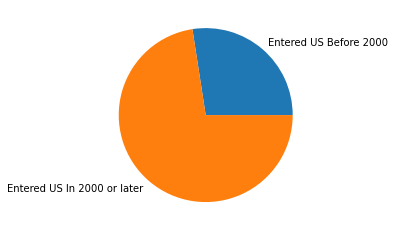

In [6]:
yoe_national = np.array([sum(yoe_national.iloc[:,0]), sum(yoe_national.iloc[:,1])])
plt.pie(yoe_national, labels=labels)
plt.savefig('YearOfEntry/BR_YOE_National_2019.png')
plt.show()

According to these pie charts, the Brazilian population in Massachusetts has a larger share arriving in the US in the 21st century than the nationwide average as of 2019.

### Data Extraction and Visualizations for Years 2012-2019

MA state code is 25.

Year of Entry data are in rows 27-28 for each year.

#### Data Extraction

In [3]:
yoe = extract_data(27, 28)
yoe.to_csv("YearOfEntry/Year Of Entry 2012-2019.csv")

#### Visualizations

In [55]:
yoe_MA_all = []
yoe_national_all = []
years = list(range(2012, 2019+1))
for year in years:
    yoe_year = yoe[yoe['Year'] == year]
    yoe_MA_all.append([year, yoe_year[25].iloc[0], yoe_year[25].iloc[1]])
    yoe_national_all.append([year, sum(yoe_year.iloc[0,3:]), sum(yoe_year.iloc[1,3:])])

The following stacked bar chart shows how the share of the Brazilian population in Massachusetts that entered the US in the 21st century has changed between 2012-2019.

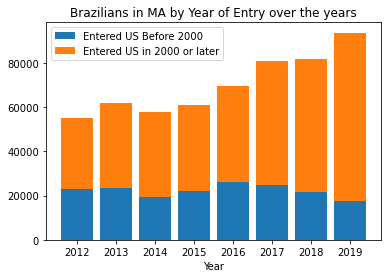

In [56]:
yoe_MA_all = np.array(yoe_MA_all)
fig, ax = plt.subplots()
ax.bar(years, yoe_MA_all[:,1], label='Entered US Before 2000')
ax.bar(years, yoe_MA_all[:,2], label='Entered US in 2000 or later', bottom=yoe_MA_all[:,1])
ax.set_xlabel('Year')
ax.set_title('Brazilians in MA by Year of Entry over the years')
ax.legend()
plt.savefig("YearOfEntry/BR_YOE_Mass_since2012.png")
plt.show()

The following stacked bar chart shows how the share of the Brazilian population nationwide that entered the US in the 21st century or later has changed between 2012-2019.

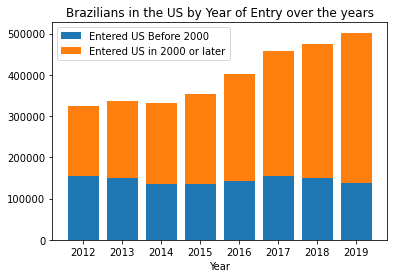

In [59]:
yoe_national_all = np.array(yoe_national_all)
fig, ax = plt.subplots()
ax.bar(years, yoe_national_all[:,1], label='Entered US Before 2000')
ax.bar(years, yoe_national_all[:,2], label='Entered US in 2000 or later', bottom=yoe_national_all[:,1])
ax.set_xlabel('Year')
ax.set_title('Brazilians in the US by Year of Entry over the years')
ax.legend()
plt.savefig("YearOfEntry/BR_YOE_national_since2012.png")
plt.show()

In [60]:
yoe_MA_all

array([[ 2012., 22922., 32187.],
       [ 2013., 23604., 38182.],
       [ 2014., 19441., 38286.],
       [ 2015., 22246., 38773.],
       [ 2016., 26332., 43222.],
       [ 2017., 24855., 55898.],
       [ 2018., 21710., 60190.],
       [ 2019., 17770., 75938.]])